# Training time weights

In [3]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history, get_weights
from connectivity_functions import artificial_connectivity_matrix

## An example for debugging

In [74]:
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False

g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.200
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Recall
T_recall = 3.0
n = 1
T_cue = 0.050


nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

manager.run_network_protocol(protocol=protocol, verbose=False)
sequences = [patterns_indexes]
aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux

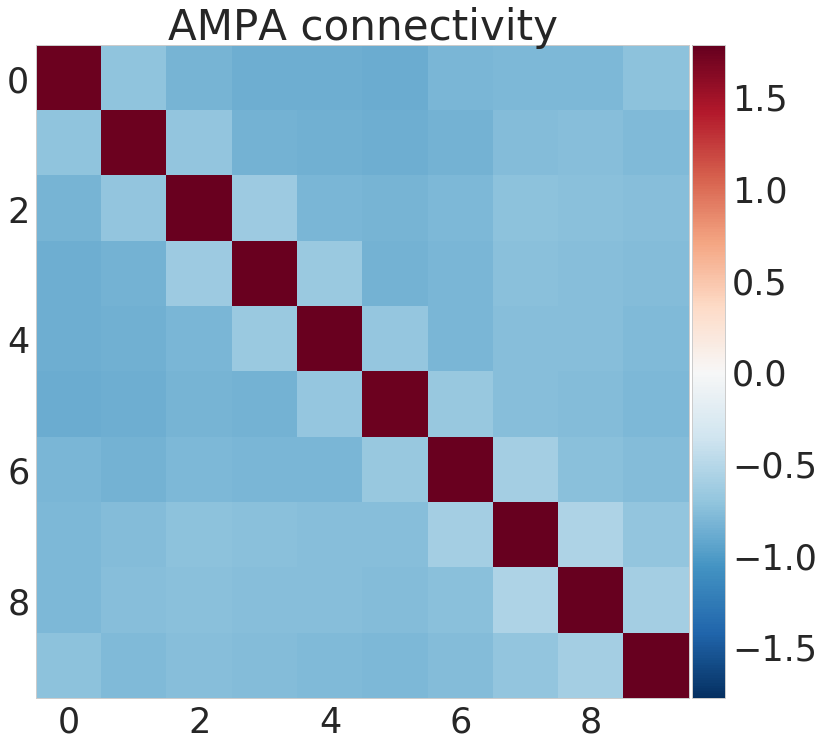

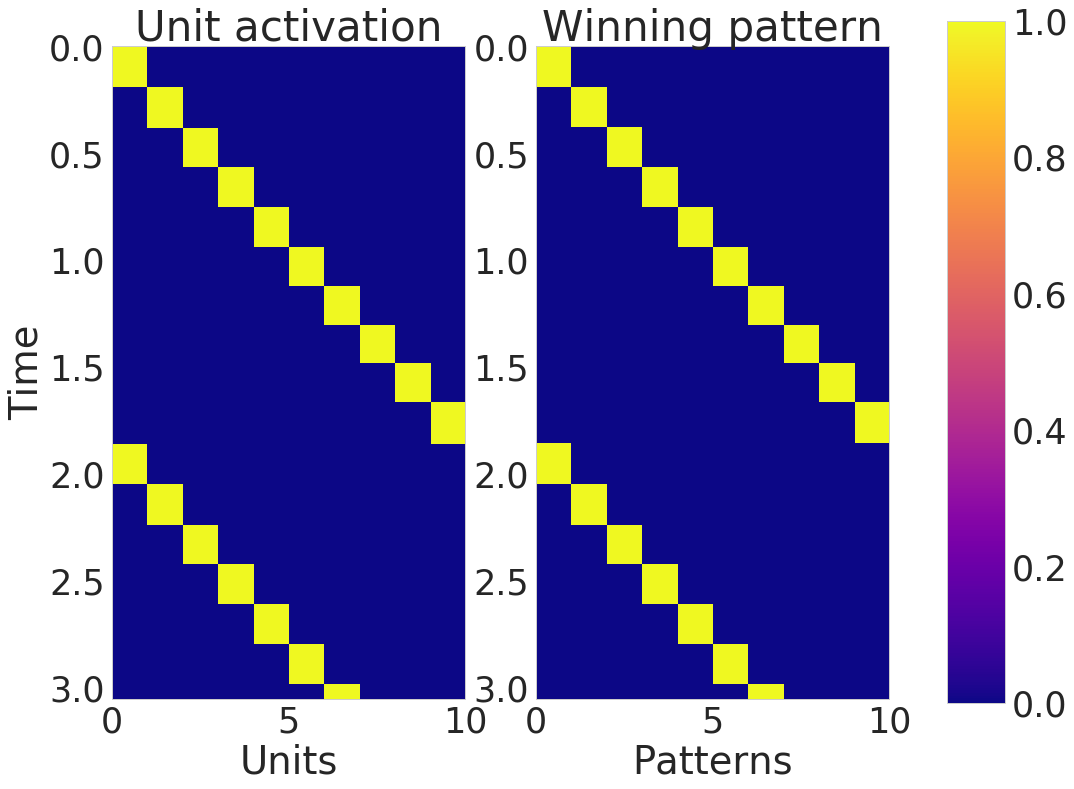

In [75]:
plot_weight_matrix(manager.nn, ampa=True)
plot_network_activity_angle(manager)

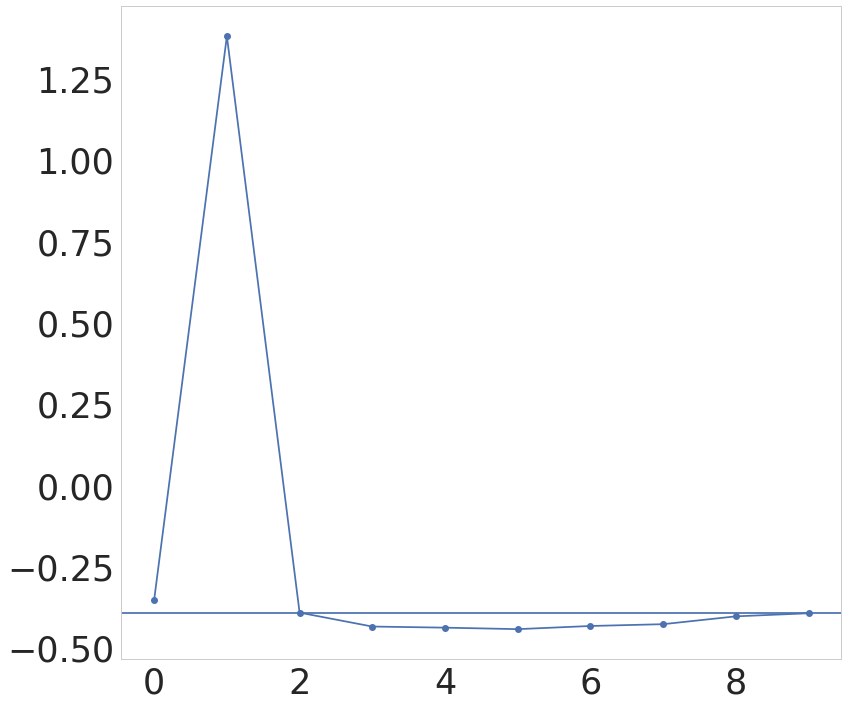

In [54]:
plt.plot(nn.w_ampa[:, 1], 'o-')
plt.axhline(nn.w_ampa[9, 1])

## Dependence of the weights in training times

In [71]:
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False

g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Recall
T_recall = 3.0
n = 1
T_cue = 0.050

In [72]:
trials = 1
num = 15

training_times_vector = np.linspace(0.050, 0.500, num=num)
success_vector = np.zeros((num, trials))
persistence_time_vector = np.zeros((num, trials))

for index, training_time_ in enumerate(training_times_vector):
    for trial in range(trials):
        # Build the network
        nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                          sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                          z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                          perfect=perfect, k_perfect=k_perfect, always_learning=always_learning)

        # Build the manager
        manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

        # Build the protocol for training
        protocol = Protocol()
        patterns_indexes = [i for i in range(n_patterns)]
        protocol.simple_protocol(patterns_indexes, training_time=training_time_, inter_pulse_interval=inter_pulse_interval,
                                 inter_sequence_interval=inter_sequence_interval, epochs=epochs)

        manager.run_network_protocol(protocol=protocol, verbose=False)
        sequences = [patterns_indexes]
        aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
        total_sequence_time, mean, std, success, timings = aux

        success_vector[index, trial] = success
        persistence_time_vector[index, trial] = mean

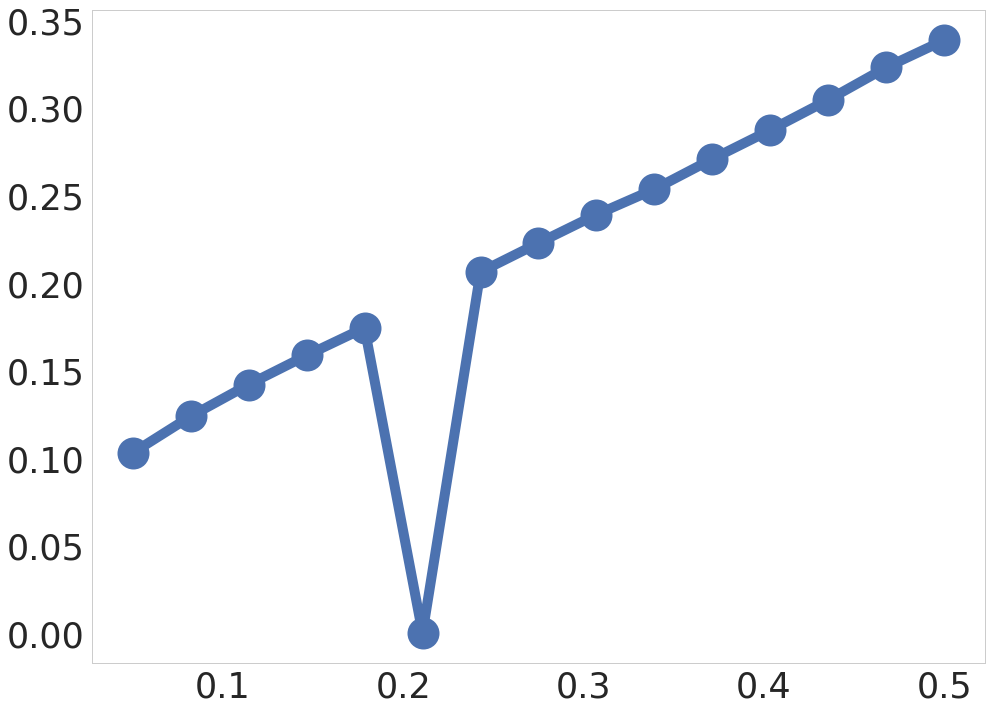

In [73]:
markersize = 32
linewidth = 10
current_palette = sns.color_palette()
index = 1

mean = persistence_time_vector.mean(axis=1)
std = persistence_time_vector.std(axis=1)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(training_times_vector, mean, 'o-', markersize=markersize, lw=linewidth)
ax.fill_between(training_times_vector, mean - std, mean + std, color=current_palette[index], alpha=0.25)

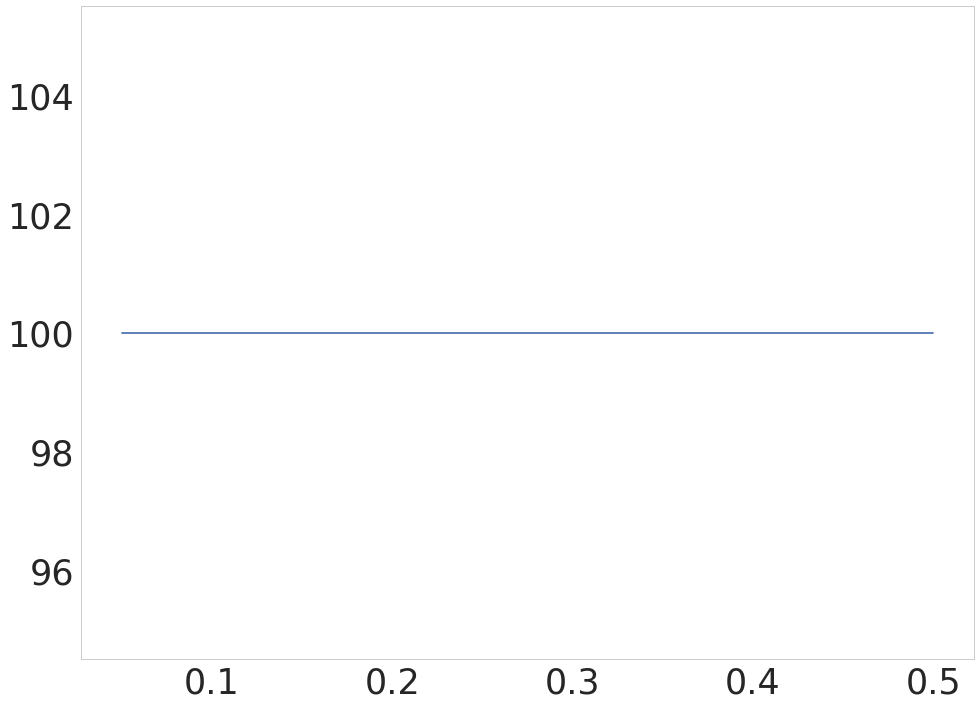

In [70]:
mean = success_vector.mean(axis=1)
std = success_vector.std(axis=1)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(training_times_vector, mean)